In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
list_landmarks = pd.read_csv('data/Anno/list_landmarks.csv')

In [3]:
def from_yolo_to_cor(box, shape):
    img_h, img_w, _ = shape
    # x1, y1 = ((x + witdth)/2)*img_width, ((y + height)/2)*img_height
    # x2, y2 = ((x - witdth)/2)*img_width, ((y - height)/2)*img_height
    x1, y1 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
    x2, y2 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)
    return x1, y1, x2, y2
    
def draw_boxes(img, boxes):
    for box in boxes:
        x1, y1, x2, y2 = from_yolo_to_cor(box, img.shape)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3)
    plt.imshow(img)

In [10]:
bbox_img = pd.read_csv('data/Anno/annotation_w-o_atr.csv')
img = cv2.imread('data/'+bbox_img.loc[99]['Path'])

In [11]:
bbox_img.loc[0]['Path']

'img/Sheer_Pleated-Front_Blouse/img_00000001.jpg'

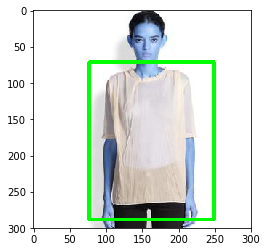

In [12]:
draw_boxes(img, [bbox_img.loc[99][['x','y', 'width', 'height']].values])

In [13]:
box = bbox_img.loc[0][['x1','y1', 'x2', 'y2']].values

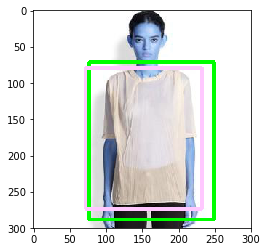

In [14]:
plt.imshow(cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (255,200,255), 3))

In [15]:
img = cv2.imread('data/test/pos-1.jpg')
box = [float(i) for i in '0.73 0.507380073800738 0.395 0.5940959409594095'.split()]

Just for sure!

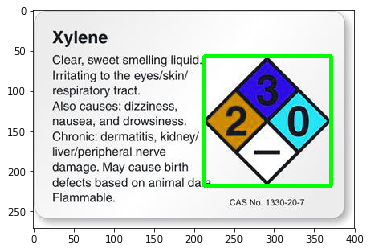

In [16]:
draw_boxes(img, [box])

In [17]:
img = cv2.imread('/home/denis/darknet/data/coco/images/train2014/COCO_train2014_000000000025.jpg')
box = []
with open('/home/denis/darknet/data/coco/labels/train2014/COCO_train2014_000000000025.txt') as f:
    for line in f.readlines():
        box.append(line.split())
box = pd.DataFrame(box, columns=['cat','x','y','w','h'])

FileNotFoundError: [Errno 2] No such file or directory: '/home/denis/darknet/data/coco/labels/train2014/COCO_train2014_000000000025.txt'

In [18]:
draw_boxes(img, box[['x','y','w','h']].astype(np.float16).values)

TypeError: list indices must be integers or slices, not list